In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')

In [3]:
sd_hf =  model_hf.state_dict()

In [4]:
# sd_hf

In [5]:
model_hf

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [6]:
for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [7]:
sd_hf['transformer.wpe.weight'].view(-1)[:100]

tensor([-1.8821e-02, -1.9742e-01,  4.0267e-03,  1.1347e-02,  6.3824e-02,
        -1.0501e-01,  3.6937e-02, -1.6803e-01, -4.9111e-02, -5.6461e-02,
        -2.4560e-03,  1.3503e-02, -4.1711e-03,  1.5115e-02,  1.6595e-02,
        -1.3808e-01, -6.3314e-03, -4.6150e-02,  2.6675e-02, -2.0417e-01,
         1.3454e-02, -3.6267e-02,  1.9301e-02, -2.5931e-02,  8.0243e-03,
         8.4712e-03, -1.9906e-02,  6.6802e-02,  7.1151e-03, -2.6618e-02,
         2.0829e-02, -3.3732e-02, -8.2898e-03,  9.8622e-03, -2.7369e-02,
        -9.9118e-02, -7.5254e-01,  2.3550e-02, -3.0513e-02,  7.7456e-02,
         3.4301e-03,  7.1132e-03,  2.6479e-02, -1.2113e-03,  1.1219e-01,
        -2.0606e-03, -2.2458e-02, -2.2287e-02,  2.3570e-02,  3.9777e-01,
         1.8856e-02,  2.0280e-02,  6.3043e-01,  2.3146e-02, -4.6894e-02,
         4.0653e+00, -1.7403e-02, -5.1683e-02,  7.2271e-02, -7.9312e-02,
         4.0248e-02,  1.9908e-02, -4.6380e-02, -2.8380e-02,  7.2535e-03,
         2.6772e-02,  1.4972e-03, -2.9892e-01, -1.1

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

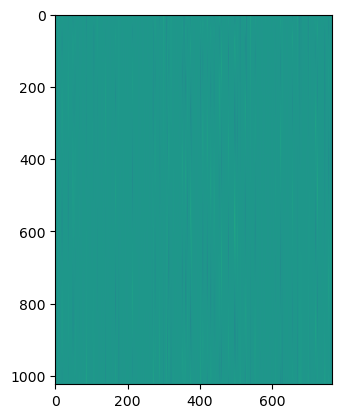

In [9]:
plt.imshow(sd_hf['transformer.wpe.weight'])

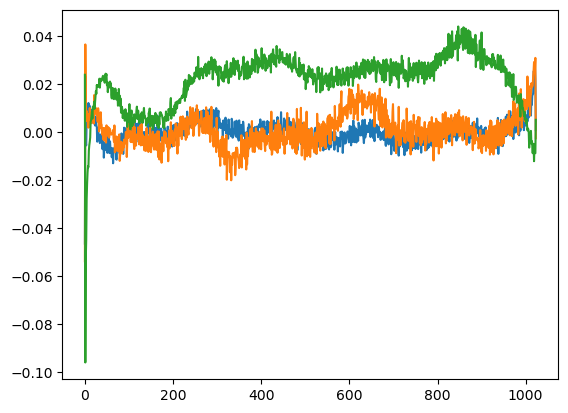

In [10]:
plt.plot(sd_hf['transformer.wpe.weight'][:, 150])
plt.plot(sd_hf['transformer.wpe.weight'][:, 200])
plt.plot(sd_hf['transformer.wpe.weight'][:, 250])

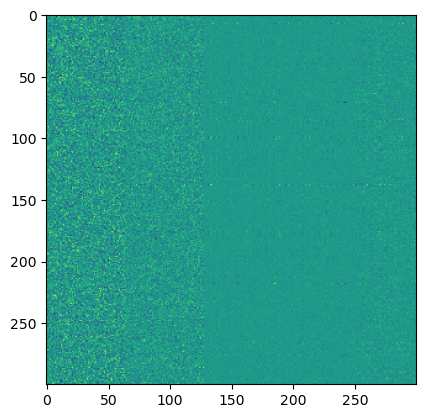

In [11]:
plt.imshow(sd_hf['transformer.h.1.attn.c_attn.weight'][:300, :300])



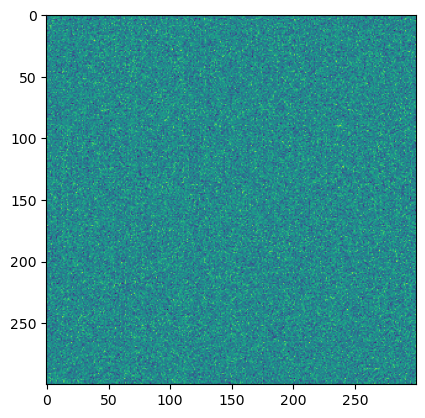

In [12]:
plt.imshow(sd_hf['transformer.h.10.attn.c_attn.weight'][:300, :300])


In [13]:
from transformers import pipeline, set_seed

import time

start = time.perf_counter()

generator = pipeline('text-generation', model='gpt2', device='cpu')

set_seed(42)

for item in generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5):
    print("\n", item)

print(f'time taken: {time.perf_counter() - start}')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 {'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"}

 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"}

 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"}

 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"}

 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}
time taken: 1.8772556249996342


In [14]:
import os
import math
import time
import inspect
from dataclasses import dataclass
import torch
import torch.nn as nn
from torch.nn import functional as F

In [15]:
torch.triu(torch.ones(4, 4), diagonal=1)

tensor([[0., 1., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]])

In [16]:
torch.tril(input=torch.ones(4,4))

tensor([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])

In [17]:
class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        n_head = config.n_head
        n_embd = config.n_embd
        
        assert n_embd % n_head == 0
        
        # query, key, value prjections all combined
        self.c_attn = nn.Linear(n_embd, 3 * n_embd)
        
        # output projection, after `v` is already multiplied with attention_scores
        self.c_proj = nn.Linear(n_embd, n_embd)
        
        block_size = config.block_size
        
        self.register_buffer('bias', torch.tril(torch.ones(block_size, block_size)).view(1, 1, block_size, block_size))
        
        self.n_embd = n_embd
        self.n_head = n_head

    def forward(self, x):
        B, T, C = x.size() # batch_size, sequence_len, embedding_dim (n_embd)
        # total dim = n_head * head_size
        # example GPT2 has 12 heads with each hs = 64 thus C= 12*64 = 768

        qkv = self.c_attn(x) # get combined qkv matix

        q, k, v = qkv.split(self.n_embd, dim=2)

        # b, seq, n_embd -> b, seq, n_heads, head_size -> b, n_heads, seq_len, head_size
        q = q.view(B, T, self.n_head, C//self.n_head).transpose(1, 2)
        # final-> bs, n_heads, seq_len, mini-n_head_embd

        k = k.view(B, T, self.n_head, C//self.n_head).transpose(1, 2)
        
        v = v.view(B, T, self.n_head, C//self.n_head).transpose(1, 2)
        
        # print(f"shape of q: {q.shape}... shape of k : {k.shape}")
        
        attn = (q @ k.transpose(-2, -1))/(math.sqrt(k.shape[-1]))

        # apply masked fill at places where mask ==0, remember tril is lower triangle
        attn = attn.masked_fill(mask = self.bias[ : , : , :T, :T] == 0, value=float('-inf'))
        
        attn = F.softmax(attn, dim=-1)
        
        y = attn @ v # B, n_heads, T/seq, T @ B, n_heads, T/Seq, head_size) -> B, n_heads, T, head_size

        # transpose y to merge all n_heads. B, n_heads, T, head_size -> transpose B, T, n_heads, head_size -> view B, T, Channel_size/n_emb 768 
        y = y.transpose(1, 2).contiguous().view(B, T, C)
        
        # out projection, B, T, C -> B, T, C
        y = self.c_proj(y)
        
        return y
        
        


In [18]:
class MLP(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_fc = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu = nn.GELU(approximate='tanh')
        self.c_proj = nn.Linear(4 * config.n_embd, config.n_embd)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return x

In [19]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.n_embd)
        self.mlp = MLP(config)
    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x

In [20]:
@dataclass
class GPTConfig:
    block_size:int = 1024 # this is max sequence len
    vocab_size:int = 50257 # total vocab including 256 bytes + 1 special token (<|endoftext|>) and 1000-257 BPE merges
    n_layer:int = 12 # number of layers 
    n_head:int = 12 # total number of attention heads
    n_embd: int = 768 # embedding dimension

In [21]:
class GPT(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
    
        self.transformer = nn.ModuleDict(
            dict(
                wte = nn.Embedding(config.vocab_size, config.n_embd),
                wpe = nn.Embedding(config.block_size, config.n_embd),
                h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
                ln_f = nn.LayerNorm(config.n_embd)
            ))

        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

    def forward(self, idx, targets=None):
        B, T = idx.size() # batch , seq_len

        # check if incoming seq_len of idx is within limits
        assert T <= self.config.block_size, f"Cannot proceed as your Sequence len : {T} is more than {self.config.block_size}"

        # forward for token and position encodings
        # shape (T)
        pos = torch.arange(0, T, dtype=torch.int32, device=idx.device)
        pos_emb = self.transformer.wpe(pos) # position embds of shape (T, n_embd)
        token_emb = self.transformer.wte(idx) # token embds of shape (Batch, T/seq_len, n_embd)

        x = pos_emb + token_emb

        # now forward through transformer blocks
        for block in self.transformer.h:
            x = block(x)
        
        # pass through final layernorm
        x = self.transformer.ln_f(x)

        # pass through final LM_HEAD
        logits = self.lm_head(x) # shape (Batch_size, T, vocab_size)

        loss = None
        if targets is not None:
            loss = F.CrossEntropy(logits.view(-1, logits.size(-1)), targets.view(-1))
        
        return logits, loss

    @classmethod
    def from_pretrained(cls, model_name):
        """for loading pre-trained GPT model weights from HuggingFace"""
        assert model_name in ['gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl']

        from transformers import GPT2LMHeadModel
        
        print(f"Loading weights from pretrained GPT model: {model_name}")

        # n_layer, n_head, n_embd for each model_name
        config_args = {
            'gpt2':        dict(n_layer=12, n_embd=768, n_head=12), # has 124M params
            'gpt2-medium': dict(n_layer=24, n_embd=1024, n_head=16), # 350M params
            'gpt2-large':  dict(n_layer=36, n_embd=1280, n_head=20), # 774M params
            'gpt2-xl':     dict(n_layer=48, n_embd=1600, n_head=25) # 1558M params
            
        }[model_name]

        config_args['vocab_size'] = 50257 # same for all GPT2 checkpoints
        config_args['block_size']= 1024 # max seq len 1024 for all GPT2 checkpoints

        config = GPTConfig(**config_args)
        model = GPT(config)

        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [key for key in sd_keys if not key.endswith('.attn.bias')] # discard this mask, not a parameter

        # initialize transformer model
        model_hf = GPT2LMHeadModel.from_pretrained(model_name)
        sd_hf = model_hf.state_dict()
        sd_hf_keys = [key for key in sd_hf.keys() if not key.endswith('.attn.masked_bias')] # to discard, not a parameter
        sd_hf_keys = [key for key in sd_hf.keys() if not key.endswith('.attn.bias')] # to discard, not a param

        # transposing these to match openai's Conv1d usage with Linear layer
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']

        print("=======\nDifference in keys: ", set(sd_keys)- set(sd_hf_keys))
        assert len(sd_keys) == len(sd_hf_keys), f"mismatched keys: sd_keys {len(sd_keys)} != sd_hd_keys {len(sd_hf_keys)}"

        for key in sd_hf_keys:
            if any(key.endswith(w) for w in transposed):
                assert sd_hf[key].shape[::-1] == sd[key].shape
                with torch.no_grad():
                    sd[key].copy_(sd_hf[key].t())
            else:
                # simple copy for other params
                assert sd_hf[key].shape == sd[key].shape
                with torch.no_grad():
                    sd[key].copy_(sd_hf[key])
                    
        return model            



In [22]:
model = GPT.from_pretrained('gpt2')
print('no crashing...')

Loading weights from pretrained GPT model: gpt2
Difference in keys:  set()
no crashing...


In [23]:
# model = GPT(GPTConfig())

In [24]:
num_return_sequences = 5
max_length = 30

In [25]:
model

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [26]:
# model.to(torch.device('mps'))

In [27]:
import tiktoken

In [28]:
enc = tiktoken.get_encoding('gpt2')


In [29]:
tokens = enc.encode("Hello, I'm a language model,")


In [30]:
tokens

[15496, 11, 314, 1101, 257, 3303, 2746, 11]

In [31]:
tokens = torch.tensor(tokens, dtype=torch.int32)

In [32]:
tokens

tensor([15496,    11,   314,  1101,   257,  3303,  2746,    11],
       dtype=torch.int32)

In [33]:
tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)

In [34]:
tokens

tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11]],
       dtype=torch.int32)

In [35]:
x = tokens.to('cpu')

In [36]:
x

tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11]],
       dtype=torch.int32)

In [37]:
torch.manual_seed(42)

In [38]:
model.eval()

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [39]:
model.to(torch.device('cpu'))

GPT(
  (transformer): ModuleDict(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [40]:
while x.size(1) < max_length:
    # forward pass through model to get logits
    print(f"\nx.shape:", x.shape)
    print(f"predicted tokens:{x}")
    with torch.no_grad():
        logits = model(x)[0] # batch_size, T, vocab_size
        logits = logits[:, -1, :] # get last position logits B, vocab_size
        # print(logits.shape)
        # calculate probabilities
        probs = F.softmax(logits, dim=-1)
        # doing topk here, HF defafult is 50
        # topk is (5, 50), top_indices is (5, 50) too
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # sampling a token from topk
        ix = torch.multinomial(topk_probs, 1) # (B, 1)

        # gather corresponding indices
        xcol = torch.gather(topk_indices, -1, ix)
        # append to the seq
        x = torch.cat([x, xcol], dim=1)
        
        


x.shape: torch.Size([5, 8])
predicted tokens:tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11]],
       dtype=torch.int32)

x.shape: torch.Size([5, 9])
predicted tokens:tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11,   407],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11,   314],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11,   407],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11,   407],
        [15496,    11,   314,  1101,   257,  3303,  2746,    11,   314]])

x.shape: torch.Size([5, 10])
predicted tokens:tensor([[15496,    11,   314,  1101,   257,  3303,  2746,    11,   407,   257],
        [15496,    11,   314,  1101,   257,  3303,  2746, 

In [41]:
for i in range(num_return_sequences):
    tokens = x[i, :max_length].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

> Hello, I'm a language model, not a science. I'm a language designer. I want to write, I want to think. I want
> Hello, I'm a language model, I use an English sentence structure, I like words over sentences.

"That's OK I'll look
> Hello, I'm a language model, not just another language." This isn't a "language model?" It's an idea. So far, what
> Hello, I'm a language model, not a programming model. I'm not a theoretical computer model - you read that right - because my ideas are
> Hello, I'm a language model, I teach myself.

I want to know more about how languages work and why they could be used.
